In [54]:
import os
import re

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
from tensorflow.contrib import learn
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from IPython.core.display import Image, display


print('TensorFlow Verions: %s' % tf.__version__)

TensorFlow Verions: 1.3.0


In [55]:
model_dir = 'tf_files/'
images_dir = 'tf_files/inputFiles/menShirt/'
list_images = [images_dir+f for f in os.listdir(images_dir) if re.search('jpg|JPG', f)]
print('Number of Customer\'s Images       : %d' % len(list_images))

Number of Customer's Images       : 693


In [56]:
def create_graph():
  with gfile.FastGFile(os.path.join(model_dir, 'retrained_graph.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

In [58]:
def extract_features(list_images):
  nb_features = 2048
  features = np.empty((len(list_images),nb_features)) # Deep Features to be stored here
  labels = [] # Image class labels to be stored here

  create_graph() # Create a TensorFlow computation graph
  
  with tf.Session() as sess:
    next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0') # We want the output features from this layer of Inception model
    
    for ind, image in enumerate(list_images):
      if (ind%10 == 0):
        print('Processing No.%2dth image: %s ...' % (ind+1, image))
      if not gfile.Exists(image):
        tf.logging.fatal('File does not exist %s', image)
          
      image_data = gfile.FastGFile(image, 'rb').read()
      predictions = sess.run(next_to_last_tensor,
                             {'DecodeJpeg/contents:0': image_data})
      features[ind,:] = np.squeeze(predictions) # Store the output deep features for images
      labels.append(re.split('_\d+',image.split('/')[1])[0]) # Get class label based on file names: Class + '_' + Digits + .jpg|JPG
          
    print('')
    print('Processing Completed !')
    return features, labels

In [59]:
features, labels = extract_features(list_images)

Processing No. 1th image: tf_files/inputFiles/menShirt/n03238879_10039_0.jpg ...
Processing No.11th image: tf_files/inputFiles/menShirt/n03238879_10880_0.jpg ...
Processing No.21th image: tf_files/inputFiles/menShirt/n03238879_11456_0.jpg ...
Processing No.31th image: tf_files/inputFiles/menShirt/n03238879_12084_0.jpg ...
Processing No.41th image: tf_files/inputFiles/menShirt/n03238879_12690_1.jpg ...
Processing No.51th image: tf_files/inputFiles/menShirt/n03238879_13708_0.jpg ...
Processing No.61th image: tf_files/inputFiles/menShirt/n03238879_14233_0.jpg ...
Processing No.71th image: tf_files/inputFiles/menShirt/n03238879_15243_0.jpg ...
Processing No.81th image: tf_files/inputFiles/menShirt/n03238879_16261_0.jpg ...
Processing No.91th image: tf_files/inputFiles/menShirt/n03238879_1726_0.jpg ...
Processing No.101th image: tf_files/inputFiles/menShirt/n03238879_1891_0.jpg ...
Processing No.111th image: tf_files/inputFiles/menShirt/n03238879_20889_0.jpg ...
Processing No.121th image: t

In [60]:
print('Number of Images Processed         : %d' % len(features))
print('Unique Image Classes (Labels)      : %s' % list(set(labels)))
print('Number of Deep Features per Images : %d <<<<<<<< Question here: Why 2048?' % len(features[0]))
print('An Image\'s Deep Features           : %s' % features[0])

Number of Images Processed         : 693
Unique Image Classes (Labels)      : ['inputFiles']
Number of Deep Features per Images : 2048 <<<<<<<< Question here: Why 2048?
An Image's Deep Features           : [ 0.20434408  0.34366417  0.24771301 ...,  0.43019933  0.55527151
  0.09045292]


In [62]:
from scipy.spatial import distance
dst = distance.euclidean(features[0],features[1])
print(dst)

20.2360395188445


In [148]:
import sys

testImageIndex = 456
minDistance = [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize]
closestImageIndex = [0,0,0,0,0]
index =0

for each_feature in features[3:600]:
    index = index +1
    currentDistance = distance.euclidean(features[testImageIndex],each_feature)
    
    closetImagesArrayIndex=0
    for eachMinDistance in minDistance:
        if currentDistance < eachMinDistance:
            minDistance[closetImagesArrayIn dex] = currentDistance
            closestImageIndex[closetImagesArrayIndex] = index
        closetImagesArrayIndex = closetImagesArrayIndex + 1
        
print("closestDistance ", minDistance)        
print("index of closest image", index)        

        
    

closestDistance  [0.0, 0.0, 0.0, 0.0, 0.0]
index of closest image 597


454


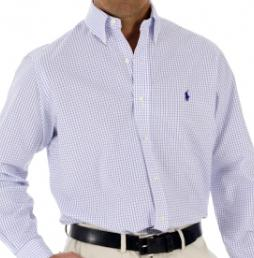

454


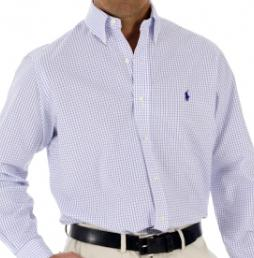

454


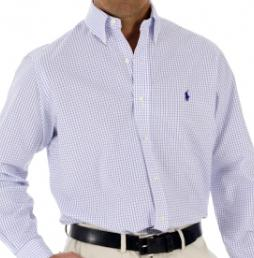

454


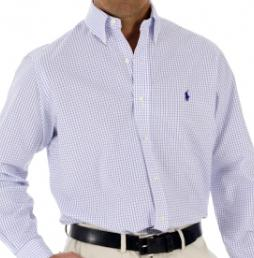

454


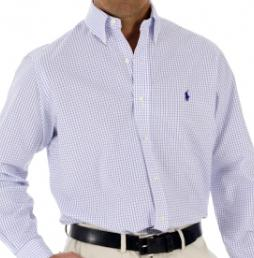

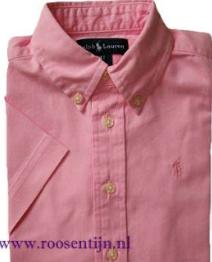

In [158]:
from IPython.display import Image
from IPython.display import display

for i in closestImageIndex:
    print(i)
    im = Image(filename=list_images[i])
    display(im)
    
testIm = Image(filename=list_images[testImageIndex])
display(testIm)